In [27]:
import numpy as np
from matplotlib import pyplot # for visualisation
import cv2 # workswith images
import skimage.measure

## Assignment 4-2: Implementation of Matrix in Image Processing

**a)** 
enter a grey scale pixel matrix [32, 32] with random colour values

In [35]:
img = cv2.imread('image.png', 0)

In [36]:
# visualisation function with forced grayscale
def myimage(image):
    # image view
    #pyplot.imshow(image)
    pyplot.imshow(img, cmap="gray", vmin=0, vmax=255)# pixel view with grayscale
    print('image size: ', image.shape)
    print('pixel matrix:\n', image)

In [40]:
# visualisation function with color
def myimagecolor(image):
    # image view
    pyplot.imshow(image)
    print('image size: ', image.shape)
    print('pixel matrix:\n', image)

In [37]:
# function to turn colored image to a grayscale image
def processImage(image):
    image = cv2.imread(image) 
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
    return image  

In [38]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

image size:  (500, 800)
pixel matrix:
 [[142 149 147 ... 134 132 132]
 [146 147 147 ... 138 137 135]
 [147 149 147 ... 143 142 140]
 ...
 [ 34  56  50 ...  46  21  21]
 [ 34  53  59 ...  43   0  21]
 [ 34  46  59 ...  39  21  21]]


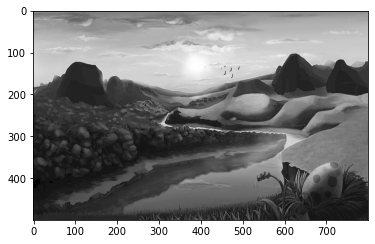

In [39]:
myimage(image)

image size:  (500, 800)
pixel matrix:
 [[142 149 147 ... 134 132 132]
 [146 147 147 ... 138 137 135]
 [147 149 147 ... 143 142 140]
 ...
 [ 34  56  50 ...  46  21  21]
 [ 34  53  59 ...  43   0  21]
 [ 34  46  59 ...  39  21  21]]


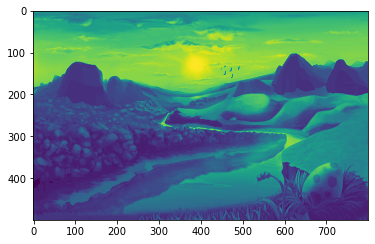

In [41]:
# show the original image with color
myimagecolor(img)

In [42]:
# resize the image
SIZE = 32
img = cv2.resize(img, (SIZE,SIZE))

image size:  (32, 32)
pixel matrix:
 [[118 125 126 ... 148 148 149]
 [164 162 171 ... 171 170 165]
 [167 158 155 ... 180 182 185]
 ...
 [ 28  34  71 ...  21  21  28]
 [ 28  28  34 ...  28  22  21]
 [ 37  39  39 ...  21  21  28]]


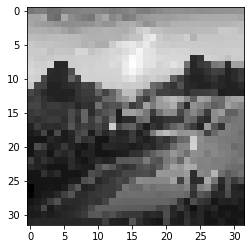

In [43]:
# show the resized image
myimage(img)

image size:  (32, 32)
pixel matrix:
 [[118 125 126 ... 148 148 149]
 [164 162 171 ... 171 170 165]
 [167 158 155 ... 180 182 185]
 ...
 [ 28  34  71 ...  21  21  28]
 [ 28  28  34 ...  28  22  21]
 [ 37  39  39 ...  21  21  28]]


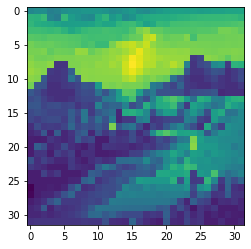

In [44]:
# show the resized image in color
myimagecolor(img)

In [45]:
# Take the image which is at 32 by 32 pixels and randomize the color values
cv2.randu(img, 0, 255) 
# This creates the matrix the assignment asks for

array([[ 91,   2,  79, ..., 197, 191, 196],
       [ 40,   7, 243, ...,  81, 118, 187],
       [167, 140, 218, ...,  72, 168, 109],
       ...,
       [ 23, 209, 141, ..., 191, 156,  30],
       [ 98, 141, 243, ..., 167,  36,  56],
       [253, 152, 240, ...,   8,  23,  48]], dtype=uint8)

image size:  (32, 32)
pixel matrix:
 [[ 91   2  79 ... 197 191 196]
 [ 40   7 243 ...  81 118 187]
 [167 140 218 ...  72 168 109]
 ...
 [ 23 209 141 ... 191 156  30]
 [ 98 141 243 ... 167  36  56]
 [253 152 240 ...   8  23  48]]


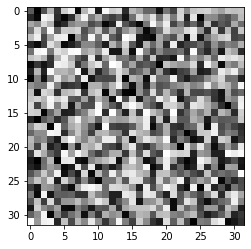

In [46]:
myimage(img)

**b)**

In [47]:
kernelHorizontal = np.array([[-1, -1, -1],
                           [2, 2, 2],
                           [-1, -1, -1]])


In [48]:
kernelVertical = np.array([[-1, 2, -1],
                           [-1, 2, -1],
                           [-1, 2, -1]])


In [49]:
kernelEdges = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

In [50]:
# Convolve and Save Output
#pyplot.imshow(convolve2D(img, kernelHorizontal, 0), cmap="gray", vmin=0, vmax=255)
output = convolve2D(img, kernelEdges, 0)
cv2.imwrite('2DConvolvedEdgesNEW.jpg', output)

True

image size:  (16, 16)
pixel matrix:
 [[ 91 243 205 236 242 248 218 183 221 224 208 214 229 211 197 196]
 [220 248 202 212 150 198 238 181 118 246 237 217 237 207 182 197]
 [239 223 240 151 246 238 179 252 178 166 237 188 230 167 216 176]
 [246 252 241 253 234 236 215 191 248 199  95 245 251 182 237 229]
 [183 248 243 247 198 230 254 179 152 158 194 151 216 241 235 238]
 [147 239 232 183 236 176 243 181 159 230 241 173 147 233 213 245]
 [210 247 234 230 187 212 251 209 148 237 242 181 218 159 167 235]
 [216 242 211 160 206 254 254 251 252 190 252 167 229 178 183 241]
 [209 199 245 240 176 251 167 203 238 196 222  96 200 240 104 200]
 [184 246 240 253 186 236 237 225 230 200 248 127 200 239 208 112]
 [226 198 247 247 201 217 174 232 220 152 254 226 230 140 252 249]
 [ 37 182 230 234 233 190 219 236 247 157 239  99 244 213 165 158]
 [197 225 239 137 213 185 238 234 221 212 196 240 165 237 113 252]
 [121 242 109 166 249 230 217 233 237 226 246 151 243 231 196 234]
 [209 217 161 190 172 232

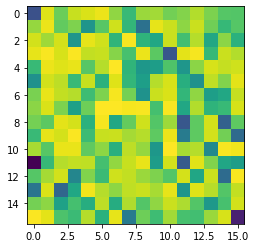

In [51]:
myimagecolor(skimage.measure.block_reduce(img, (2,2), np.max))

In [53]:
cv2.imwrite('2DMaxPoolLARGENEW.jpg', skimage.measure.block_reduce(img, (2,2), np.max))

True

In [33]:
# Edge Detection Kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

In [10]:
# Convolve and Save Output
output = convolve2D(image, kernel, padding=2)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 137. ... 128.   0.   0.]
 ...
 [  0.   0.  31. ...  16.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [11]:
cv2.imwrite('2DConvolved.png', output)

True

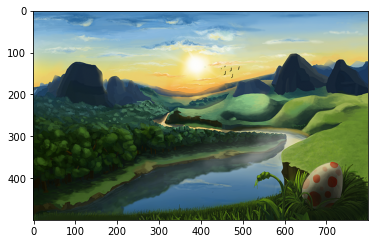

image size:  (500, 800, 3)
pixel matrix:
 [[[0.35686275 0.58431373 0.77254902]
  [0.39215686 0.61176471 0.78431373]
  [0.38039216 0.60784314 0.77647059]
  ...
  [0.34509804 0.55686275 0.70980392]
  [0.33333333 0.54901961 0.70196078]
  [0.3372549  0.54901961 0.70196078]]

 [[0.38039216 0.60392157 0.78039216]
  [0.38431373 0.60784314 0.77254902]
  [0.38823529 0.60784314 0.78039216]
  ...
  [0.36470588 0.56862745 0.72941176]
  [0.35294118 0.56862745 0.72156863]
  [0.34509804 0.56078431 0.71372549]]

 [[0.38039216 0.60784314 0.78039216]
  [0.38823529 0.61176471 0.78039216]
  [0.38823529 0.60784314 0.78431373]
  ...
  [0.38039216 0.58823529 0.74509804]
  [0.37647059 0.58823529 0.74117647]
  [0.36078431 0.58039216 0.73333333]]

 ...

 [[0.09019608 0.16862745 0.09019608]
  [0.16470588 0.24705882 0.09019608]
  [0.14509804 0.22745098 0.08235294]
  ...
  [0.1254902  0.21568627 0.05882353]
  [0.04705882 0.07058824 0.03921569]
  [0.03529412 0.0627451  0.04705882]]

 [[0.08627451 0.14901961 0.08235

In [11]:
color_img = np.asarray(Image.open("image.png")) / 255
myimage(color_img)

In [8]:
img = np.random.randint(256, size=(32,32))
img

array([[151,  89,  19, ..., 128,  32, 224],
       [ 36, 203, 140, ..., 150,  87,  51],
       [ 48,  29,  44, ..., 238, 144, 217],
       ...,
       [ 43,  58,  73, ..., 227, 148, 118],
       [187,   6,  12, ..., 144, 139, 161],
       [ 44,  55, 238, ..., 144, 241, 234]])

In [9]:
# visualisation function
def myimage(image):
    # image view
    pyplot.imshow(image)
    pyplot.show()
    # pixel view
    print('image size: ', image.shape)
    print('pixel matrix:\n', image)

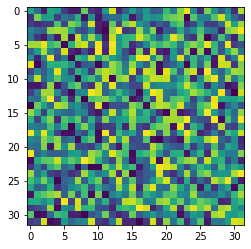

image size:  (32, 32)
pixel matrix:
 [[151  89  19 ... 128  32 224]
 [ 36 203 140 ... 150  87  51]
 [ 48  29  44 ... 238 144 217]
 ...
 [ 43  58  73 ... 227 148 118]
 [187   6  12 ... 144 139 161]
 [ 44  55 238 ... 144 241 234]]


In [10]:
# show the original image
myimage(img)

**b)** 
filter it by convolutional multiplication with a sparse matrix for discovering vertical lines

In [13]:
sparse_img = csr_matrix((color_img),dtype=np.int8).toarray()
print(sparse_img)

TypeError: expected dimension <= 2 array or matrix

**c)** 
reshape it by applying max-poolmethod with size [2x2] and stride of 2

In [46]:
pool_img = skimage.measure.block_reduce(sparse_img, (2,2), np.max)

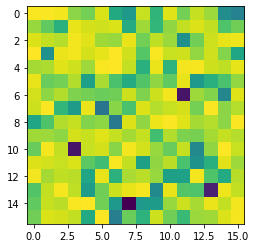

image size:  (16, 16)
pixel matrix:
 [[125 126 123  91  84 115  46  32 110  56 117  84 109  97  22  12]
 [ 95  77  52 120 114 112 115  48  98  57  93 108 116 108  70  82]
 [116 108 104 123 117  98  95 120  83 107  96  24  83 111 120 122]
 [127  25 121 123 114 119 127 112  73 125 110 112  94 112  89  42]
 [ 99 102 117 112  97 125 127 108  52 121  54 123 124 111 107 119]
 [120  80  84 103  37 101  68  48  71  93  77 119  32  52  68  94]
 [113  92 103  87  84  81  82 111  87 111 123 -67  97  88  16 117]
 [111 126  57  34 121   1  90  68 116 104 110 114  84 126  91 104]
 [ 43  70 103 109  88  92   4 116  93 122 126 117  99 104  91 126]
 [ 98  97  92 114 110 117 109  99 109  65 103  86  85  99 109 104]
 [ 79 124 108 -67 110 114  90 123 113  95  79 109  18  93 127 110]
 [116 113 110 115  75  64 125 108  38  93 106  68  27  52 118  97]
 [123  99 107 106  43 120  53 101 106  95  38  39 123  70  47 105]
 [ 71 108 124 107  35  82 111 120 124  19 120  72  70 -60 122 108]
 [ 77 109 106 125 127  83

In [47]:
myimage(pool_img)